<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/Homework_fuzzy/TemperatureController.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

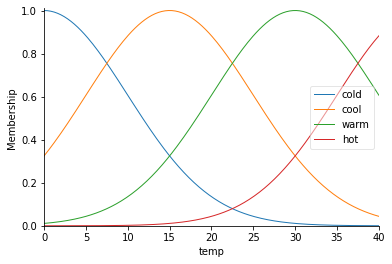

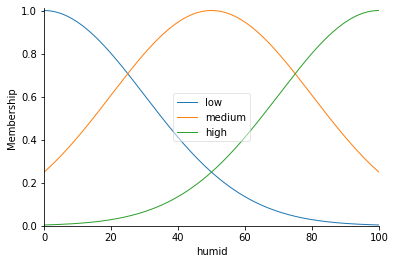

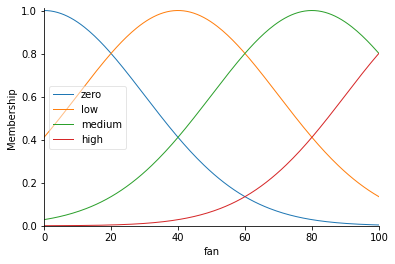

In [3]:
import numpy as np
import skfuzzy as fzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d 
     

universe = np.linspace(0,40,200) 
universe1 = np.linspace(0,100,200)
universe2 = np.linspace(0,100,200)
temp = ctrl.Antecedent(universe, 'temp')
humid = ctrl.Antecedent(universe1, 'humid')
fan = ctrl.Consequent(universe2, 'fan')
     

temp['cold'] = fzz.gaussmf(temp.universe,0,10)
temp['cool'] = fzz.gaussmf(temp.universe,15,10)
temp['warm'] = fzz.gaussmf(temp.universe,30,10)
temp['hot'] = fzz.gaussmf(temp.universe,45,10)
temp.view()

humid['low'] = fzz.gaussmf(humid.universe,0,30)
humid['medium'] = fzz.gaussmf(humid.universe,50,30)
humid['high'] = fzz.gaussmf(humid.universe,100,30)
humid.view()

fan['zero'] = fzz.gaussmf(fan.universe,0,30)
fan['low'] = fzz.gaussmf(fan.universe,40,30)
fan['medium'] = fzz.gaussmf(fan.universe,80,30)
fan['high'] = fzz.gaussmf(fan.universe,120,30)
fan.view()

rule0 = ctrl.Rule(antecedent=((temp['cool']&humid['high'])|(temp['cold']&humid['medium'])|
                              (temp['cold']&humid['low'])), consequent= fan['medium'])

rule1 = ctrl.Rule(antecedent=((temp['warm']&humid['high'])|(temp['cool']&humid['medium'])|
                              (temp['cool']&humid['low'])), consequent= fan['low'])

rule2 = ctrl.Rule(antecedent=((temp['hot']&humid['high'])|(temp['warm']&humid['medium'])|
                              (temp['hot']&humid['medium'])|
                              (temp['hot']&humid['low'])|
                              (temp['warm']&humid['low'])), consequent= fan['zero'])

rule3 = ctrl.Rule(antecedent=((temp['cold']&humid['high'])), consequent= fan['high'])

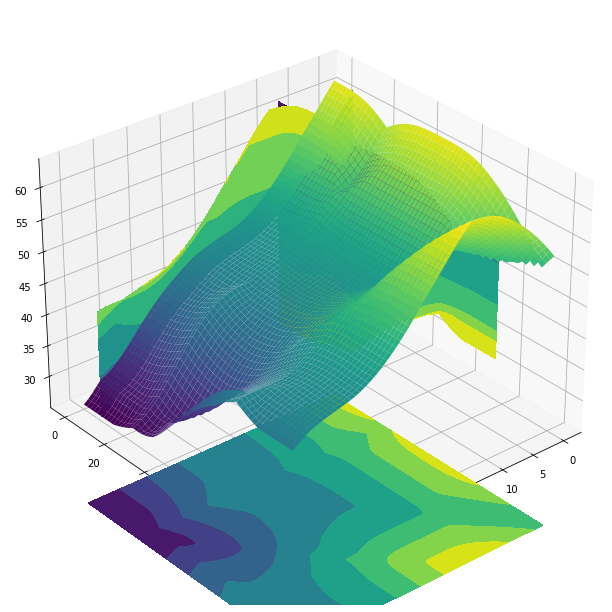

In [4]:
System  = ctrl.ControlSystem(rules = [rule1, rule2, rule0])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(0,40,61)
upSampled2 = np.linspace(0,100,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['temp']= x[i,j]
    sim.input['humid']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['fan']
     

fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 9, cmap= 'viridis')
cset = ax.contourf(x,y,z, zdir= 'x', offset= 9, cmap= 'viridis')
cset = ax.contourf(x,y,z, zdir= 'y', offset= 9, cmap= 'viridis')
ax.view_init(30,50)

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fc8dc7d32ddf3b46451c6f0a2dd17d7633cff5d7463ee274744c75c24f1a98b0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
